In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [35]:
np.random.seed(42)

In [36]:
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

In [40]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35.7,2.35,90.8,27.08,187.90,42.7,0.274,185.1,299,1.47,102.654,2.29,6588,34.2,1484,0.926,1.392,75.4,4.06,71.92
996,83.2,2.92,41.0,24.22,60.14,38.2,0.300,157.5,97,1.17,99.714,2.30,4431,21.8,1045,0.724,1.845,62.5,9.10,22.43
997,37.3,1.16,51.9,25.37,92.78,43.3,0.385,237.6,166,0.72,100.844,2.07,916,21.2,1311,0.876,0.609,71.0,5.87,19.73
998,87.8,1.15,50.8,30.04,168.43,35.8,0.205,382.3,276,1.22,100.460,1.95,8917,19.8,1971,0.752,1.974,59.8,5.59,147.38


In [47]:
data.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
Target1    0
Target2    0
Target3    0
Target4    0
Target5    0
dtype: int64

In [37]:
pca = PCA(n_components=0.95)
scaler = StandardScaler()
columns = [f'F{i}' for i in range(1,16)]
features = data[columns]
scaled_columns = scaler.fit_transform(features)
scaled_columns_dataframe = pd.DataFrame(scaled_columns,columns=columns)
pca_decomposed_data = pca.fit_transform(scaled_columns_dataframe)
pca_decomposed_dataframe = pd.DataFrame(pca_decomposed_data , columns = [f'feature{i}' for i in range(pca_decomposed_data.shape[1])])

In [38]:
pca_decomposed_dataframe

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
0,-1.258936,-0.399400,-1.271672,0.533474,-1.170159,-2.947086,0.463291,0.206951,0.831446,-0.376086,-0.568006,0.463785,-0.206761,0.080840,0.191787
1,0.389780,-0.721013,-0.590588,0.196720,-0.970445,0.098849,-0.476049,-0.256002,1.459430,-0.251025,0.220700,-2.007709,-0.043894,0.183764,1.642719
2,0.609518,1.700279,-0.178721,0.590286,-0.936945,2.533052,0.265931,-0.580668,-1.064437,-0.560648,0.926251,1.123766,-1.559180,0.051956,0.405183
3,0.046739,0.602894,0.760259,0.429906,1.499243,-0.241153,1.915709,1.529909,0.963867,2.089198,0.015880,0.090502,0.185048,-0.321801,-0.130786
4,-1.226920,0.052507,-0.569407,-0.396360,2.159374,0.734247,0.185450,-0.556908,0.020053,-0.530015,-0.856444,-0.839744,0.112155,-0.416354,-1.577047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996481,-0.797238,1.567371,0.324339,1.060930,0.456354,0.100217,-0.221427,0.174668,-1.721111,2.070652,0.119477,-0.443637,-0.029236,0.159906
996,-0.372237,1.154910,-1.064568,0.790923,-0.426320,-0.044215,0.496612,0.483601,-0.538658,0.247743,-0.682318,-1.701727,0.214076,-1.792150,0.294652
997,-1.495171,0.091612,0.546220,-0.209207,-0.319727,-1.974981,-0.398978,-0.730259,-1.284755,-0.224394,-0.021147,1.024516,0.428032,-0.802541,1.373654
998,0.714069,-0.293823,-0.482753,-1.987685,-1.624909,1.361983,-0.872138,-0.662173,-0.001388,0.899616,-0.053086,0.063393,-0.942208,0.901949,1.598829


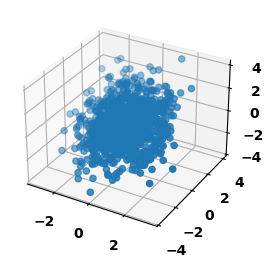

In [39]:
fig = plt.figure(figsize=(10,3))
ax = plt.axes(projection = "3d")

ax.scatter(pca_decomposed_dataframe['feature0'], pca_decomposed_dataframe['feature1'] , pca_decomposed_dataframe['feature1'])

In [49]:
final_dataset = pd.concat([pca_decomposed_dataframe , data['Target5']],axis=1)

In [56]:
# from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from sklearn.neighbors import RadiusNeighborsRegressor

# # from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
bagging = BaggingRegressor(n_estimators=4000)
ada = AdaBoostRegressor(n_estimators=4000)
extr = ExtraTreesRegressor(n_estimators=4000)
randomforest = RandomForestRegressor(n_estimators=4000)
gradient_boost = GradientBoostingRegressor(n_estimators=4000)
hist_grad = HistGradientBoostingRegressor()
svr = SVR()
rnn = RadiusNeighborsRegressor()
mlpr = MLPRegressor(hidden_layer_sizes=(500,500))
xgb = XGBRegressor()

models = {
    'Bagging Regressor' : bagging , 
    'AdaBoostRegressor' : ada , 
    'Extra Trees' : extr , 
    'RandomForestRegressor' : randomforest , 
    'GradientBoostingRegressor' : gradient_boost ,
    'HistGradientBoostingRegressor' : hist_grad , 
    'SVR' : svr , 
    # 'Radius Neighbour Regressor' : rnn ,
    'MLPRegressor' : mlpr ,
    'XGBRegressor' : xgb
}

x = final_dataset.drop('Target5' ,  axis=1)
y = final_dataset['Target5']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.3)

for name, model in models.items():
    print('Processing:  ',name)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('mean_squared_error: ',mean_squared_error(ytest,ypred))

Processing:   Bagging Regressor
mean_squared_error:  875.4331875983925
Processing:   AdaBoostRegressor
mean_squared_error:  1070.0797794675311
Processing:   Extra Trees
mean_squared_error:  801.4974809222789
Processing:   RandomForestRegressor
mean_squared_error:  878.7774002632697
Processing:   GradientBoostingRegressor
mean_squared_error:  712.0883955088528
Processing:   HistGradientBoostingRegressor
mean_squared_error:  690.2060873972183
Processing:   SVR
mean_squared_error:  1628.717908817645
Processing:   MLPRegressor


d:\IDEs\anaconda\envs\assignment-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mean_squared_error:  458.37718532138086
Processing:   XGBRegressor
mean_squared_error:  860.6463421075522


In [53]:
print(y.isna().sum())

0
